# IMSE 586: Project by Apurba Saha

## Analysis and comparison of traffic crash data of Southeast Michigan for the year of 2015 and 2020.



In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# Crash data of 2015
crash15 = pd.read_csv('./data/SEM_2015.csv')
crash15

,CRSH_ID,ROADNAME,MILE,PR,MONTH,DATE,YEAR,DAY,TIME,SEVERITY,TYPE,WEATHER,LIGHTING,ROADCONDITION,OFFSETDISTANCE,UNITS,FACTOR,Unnamed: 17
0,9141401,S M 39,13.151,1592407,Jan,1,2015,Thu,8am,C-level,Single veh.,Clear,Daylight,Dry,NaN,1,A L,NaN
1,9141491,Pelham Rd,0.654,1652704,Jan,1,2015,Thu,1am,C-level,Single veh.,Clear,Lights,Dry,48.0,1,L,NaN
2,9141494,S M 39,2.249,1592407,Jan,1,2015,Thu,3am,PDO,Single veh.,Clear,Lights,Dry,0.0,1,A L,NaN
3,9141498,Schoolcraft Rd,8.918,4705258,Jan,1,2015,Thu,5am,PDO,Single veh.,Clear,Lights,Dry,11.0,1,A I,NaN
4,9141972,Arlingdale Dr,0.062,833709,Jan,1,2015,Thu,5am,PDO,Swipe-same,Clear,Dark,Dry,26.0,2,A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108021,9671422,Telegraph Rd,16.589,1576806,Dec,13,2015,Sun,6pm,PDO,Rear-end,Clear,Lights,Dry,5.0,2,I Y,NaN
108022,9672319,Rochelle St,1.050,1588305,Dec,28,2015,Mon,6pm,PDO,Head-on,Cloudy,Lights,Icy,0.0,2,A I,NaN
108023,9673439,Cass Ave,0.073,1577605,Nov,22,2015,Sun,3pm,PDO,Single veh.,Clear,Daylight,Dry,5.0,1,L,NaN
108024,9674934,25 Mile Rd,4.045,4211019,Jun,28,2015,Sun,3pm,C-level,Angle,Clear,Daylight,Dry,0.0,2,I R Y,NaN


In [3]:
# Crash data of 2020
crash20 = pd.read_csv('./data/SEM_2020.csv')
crash20

,CRSH_ID,ROADNAME,MILE,PR,MONTH,DATE,YEAR,DAY,TIME,SEVERITY,TYPE,WEATHER,LIGHTING,ROADCONDITION,OFFSETDISTANCE,UNITS,FACTOR,Unnamed: 17
0,1911437,Hillsdale Dr,0.196,828407.0,Jan,1,2020,Wed,7am,PDO,Single veh.,Cloudy,Dawn,Icy,63.0,1,L,NaN
1,1911613,Gratiot Ave,1.409,4705742.0,Jan,1,2020,Wed,2am,C-level,Head-left,Clear,Lights,Snowy,11.0,2,A Y,NaN
2,1911620,Milwaukee St E,1.725,1585705.0,Jan,1,2020,Wed,2am,C-level,Other,Snow,Lights,Icy,26.0,2,I Y,NaN
3,1911624,Keating St,0.680,1601901.0,Jan,1,2020,Wed,8am,PDO,Swipe-opp.,Sleet / Hail,Unknown,Icy,0.0,2,H I,NaN
4,1911640,Hamilton Ave,0.406,1615607.0,Jan,1,2020,Wed,2am,PDO,Angle,Snow,Lights,Icy,0.0,2,I,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85722,2248463,Harper Ave,5.767,798408.0,Aug,28,2020,Fri,11am,PDO,Single veh.,Rain,Daylight,Wet,16.0,1,F L,NaN
85723,2248581,NaN,NaN,NaN,Dec,23,2020,Wed,3pm,PDO,Rear-end,Rain,Daylight,Wet,NaN,2,Y,NaN
85724,2249176,13 Mile Rd W,5.120,607408.0,Oct,1,2020,Thu,10pm,PDO,Rear-end,Clear,Lights,Dry,5.0,2,F I,NaN
85725,2249720,Martin Pkwy,0.907,4416635.0,Dec,11,2020,Fri,10am,PDO,Angle,Clear,Daylight,Dry,11.0,2,F I,NaN


## Showing the summary of data

In [4]:
# Finding the summary of the data like number of rows and columns etc. for 2015
print('Rows =',crash15.shape[0])
print('Number of columns =',crash15.shape[1])
print('Features or Column names =',crash15.columns.tolist())
print('\n Missing values :',crash15.isnull().values.sum())
print('\n Unique values : \n',crash15.nunique())

Rows = 108026
Number of columns = 18
Features or Column names = ['CRSH_ID', 'ROADNAME', 'MILE', 'PR', 'MONTH', 'DATE', 'YEAR', 'DAY', 'TIME', 'SEVERITY', 'TYPE', 'WEATHER', 'LIGHTING', 'ROADCONDITION', 'OFFSETDISTANCE', 'UNITS', 'FACTOR', 'Unnamed: 17']

 Missing values : 128681

 Unique values : 
 CRSH_ID           108026
ROADNAME            9053
MILE               19391
PR                 11728
MONTH                 12
DATE                  31
YEAR                   1
DAY                    7
TIME                  25
SEVERITY               5
TYPE                  12
WEATHER               10
LIGHTING               7
ROADCONDITION         10
OFFSETDISTANCE        48
UNITS                 12
FACTOR               458
Unnamed: 17            0
dtype: int64


In [5]:
# Finding the summary of the data like number of rows and columns etc. for 2020
print('Rows =',crash20.shape[0])
print('Number of columns =',crash20.shape[1])
print('Features or Column names =',crash20.columns.tolist())
print('\n Missing values :',crash20.isnull().values.sum())
print('\n Unique values : \n',crash20.nunique())

Rows = 85727
Number of columns = 18
Features or Column names = ['CRSH_ID', 'ROADNAME', 'MILE', 'PR', 'MONTH', 'DATE', 'YEAR', 'DAY', 'TIME', 'SEVERITY', 'TYPE', 'WEATHER', 'LIGHTING', 'ROADCONDITION', 'OFFSETDISTANCE', 'UNITS', 'FACTOR', 'Unnamed: 17']

 Missing values : 104810

 Unique values : 
 CRSH_ID           85727
ROADNAME           8393
MILE              18016
PR                10980
MONTH                12
DATE                 31
YEAR                  1
DAY                   7
TIME                 25
SEVERITY              5
TYPE                 12
WEATHER              11
LIGHTING              7
ROADCONDITION        12
OFFSETDISTANCE       48
UNITS                 8
FACTOR              719
Unnamed: 17           0
dtype: int64


## Heatmap of data

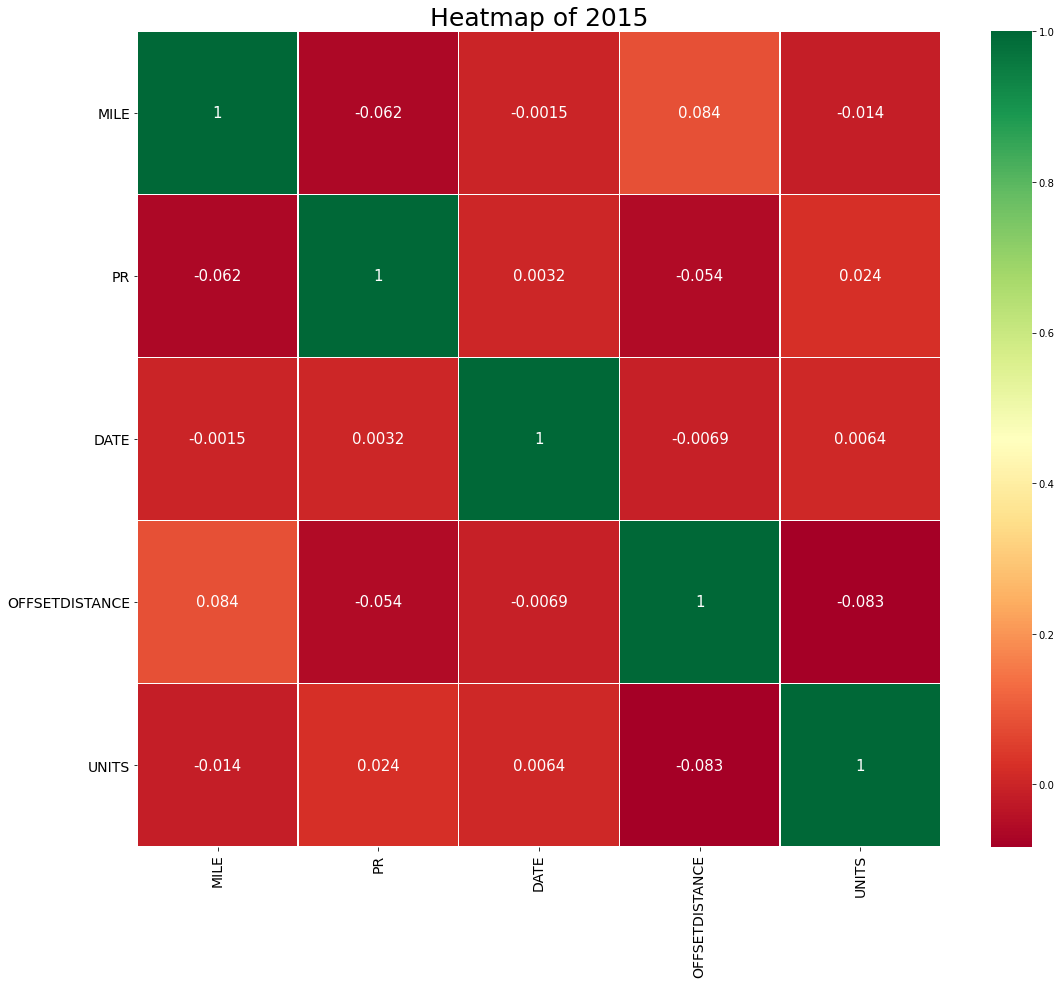

In [6]:
# Finding the correlations in the data for year 2015
fig=sns.heatmap(crash15[[ 'ROADNAME', 'MILE', 'PR', 'MONTH', 'DATE', 'DAY', 'TIME', 
                         'SEVERITY', 'TYPE', 'WEATHER', 'LIGHTING', 'ROADCONDITION', 
                         'OFFSETDISTANCE', 'UNITS', 'FACTOR']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2 ,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Heatmap of 2015',fontsize=25)
plt.show()

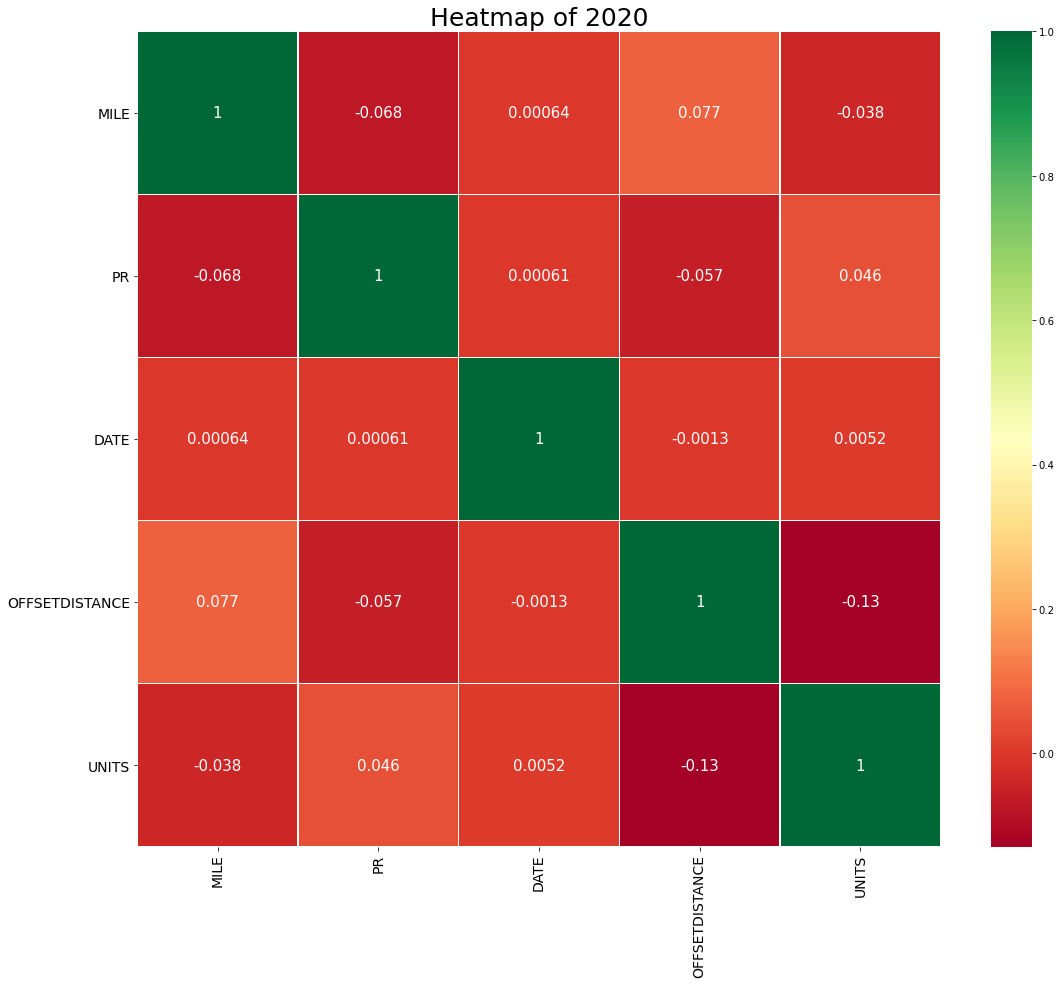

In [7]:
# Finding the correlations in the data for year 2020
fig=sns.heatmap(crash20[[ 'ROADNAME', 'MILE', 'PR', 'MONTH', 'DATE', 'DAY', 'TIME', 
                         'SEVERITY', 'TYPE', 'WEATHER', 'LIGHTING', 'ROADCONDITION', 
                         'OFFSETDISTANCE', 'UNITS', 'FACTOR']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2 ,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Heatmap of 2020',fontsize=25)
plt.show()

## Comparision of years in terms of total crash

In [8]:
# Display the total number of crashes in 2015
print('Total Number of Reported Crashes in 2015 =', crash15['CRSH_ID'].nunique())


Total Number of Reported Crashes in 2015 = 108026


In [9]:
# Display the total number of crashes in 2020
print('Total Number of Reported Crashes in 2020 =', crash20['CRSH_ID'].nunique())

Total Number of Reported Crashes in 2020 = 85727


Text(0, 0.5, 'Number of accidents')

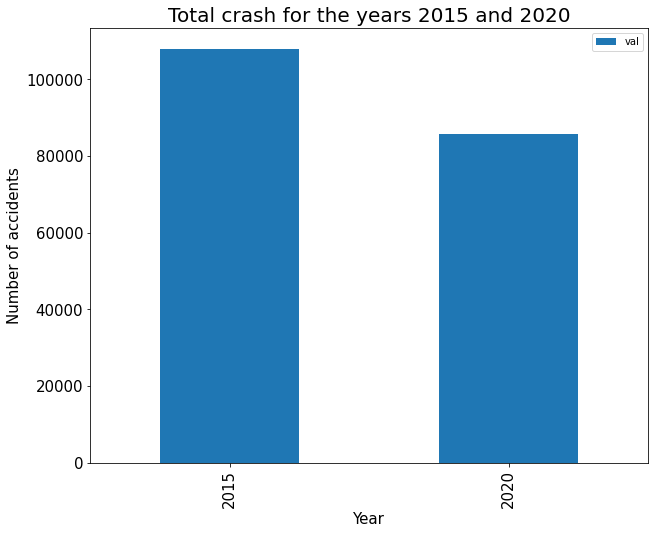

In [10]:
yearly_crash = pd.DataFrame({'year':['2015', '2020'], 'val':[108026, 85727]})
ax = yearly_crash.plot.bar(x='year', y='val', figsize=(10,8))
plt.title('Total crash for the years 2015 and 2020',fontsize=20)
ax.tick_params(labelsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of accidents',fontsize=15)

In [11]:
crash15['SEVERITY'].value_counts()

PDO        83773
C-level    16530
B-level     5933
A-level     1436
Fatal        354
Name: SEVERITY, dtype: int64

## Accident by crash Severity

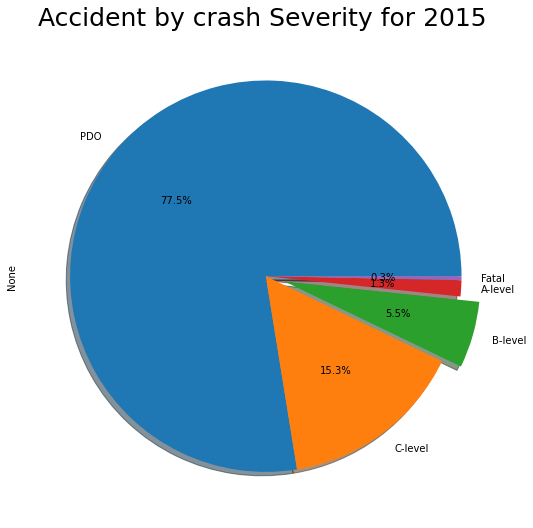

In [12]:
#Accident by crash Severity in 2015
plt.figure(figsize=(16,9))
plt.title('Accident by crash Severity for 2015 ',fontsize=25)
crash15.groupby('SEVERITY')  \
    .size()\
    .sort_values(ascending =False) \
    .iloc[:5] \
    .plot.pie(explode=[0,0,0.1,0,0],autopct='%1.1f%%',shadow=True)
plt.ioff()

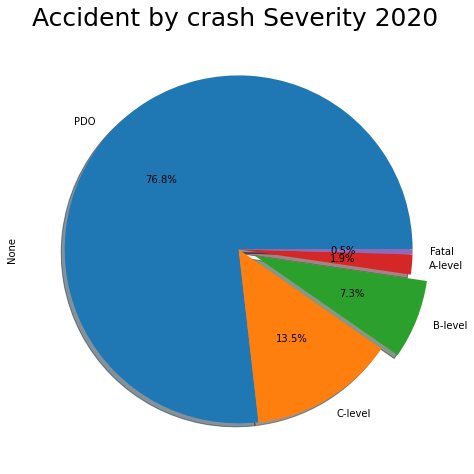

In [13]:
#Accident by crash Severity in 2015
plt.figure(figsize=(14,8))
plt.title('Accident by crash Severity 2020 ',fontsize=25)
crash20.groupby('SEVERITY')  \
    .size()\
    .sort_values(ascending =False) \
    .iloc[:5] \
    .plot.pie(explode=[0,0,0.1,0,0],autopct='%1.1f%%',shadow=True)
plt.ioff()

## Accident by crash place and severity

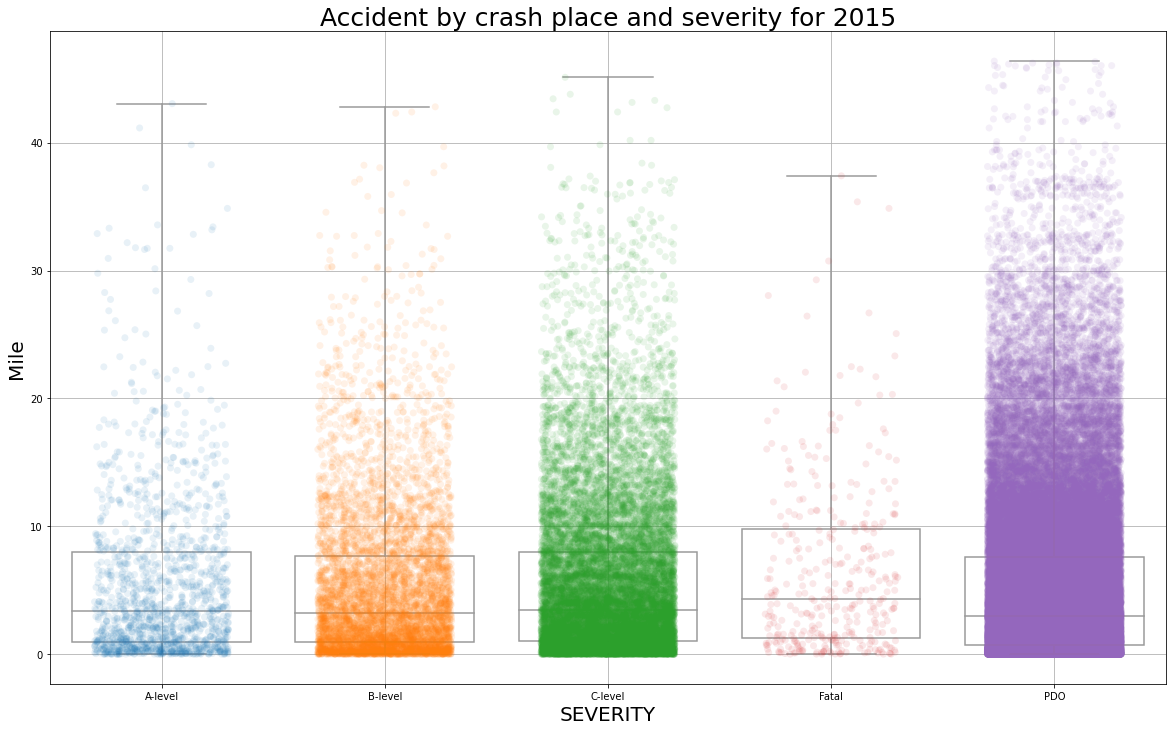

In [14]:
# Accident by crash place and severity for 2015
crash15s=crash15.sort_values(by="SEVERITY")
plt.figure(figsize=(20, 12))
sns.stripplot(x="SEVERITY", y="MILE", data=crash15s, jitter=0.3, size=7, alpha=0.1 )
sns.boxplot(x="SEVERITY", y="MILE", data=crash15s, color="white", whis=np.inf)
plt.xlabel('SEVERITY',fontsize=20)
plt.ylabel('Mile',fontsize=20)
plt.title('Accident by crash place and severity for 2015',fontsize=25)
plt.grid()
plt.ioff()

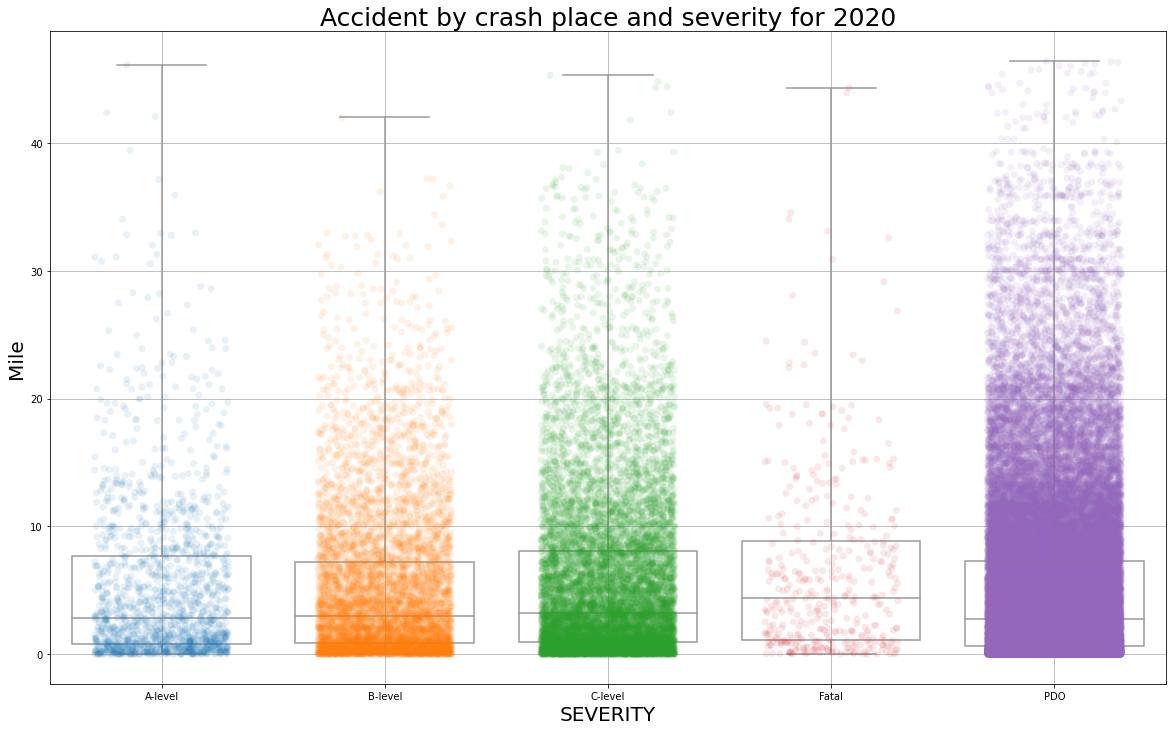

In [15]:
# Accident by crash place and severity for 2020
crash20s=crash20.sort_values(by="SEVERITY")
plt.figure(figsize=(20, 12))
sns.stripplot(x="SEVERITY", y="MILE", data=crash20s, jitter=0.3, size=7, alpha=0.1 )
sns.boxplot(x="SEVERITY", y="MILE", data=crash20s, color="white", whis=np.inf)
plt.xlabel('SEVERITY',fontsize=20)
plt.ylabel('Mile',fontsize=20)
ax.tick_params(labelsize=17)
plt.title('Accident by crash place and severity for 2020',fontsize=25)
plt.grid()
plt.ioff()

## Accidents based on time, day and month

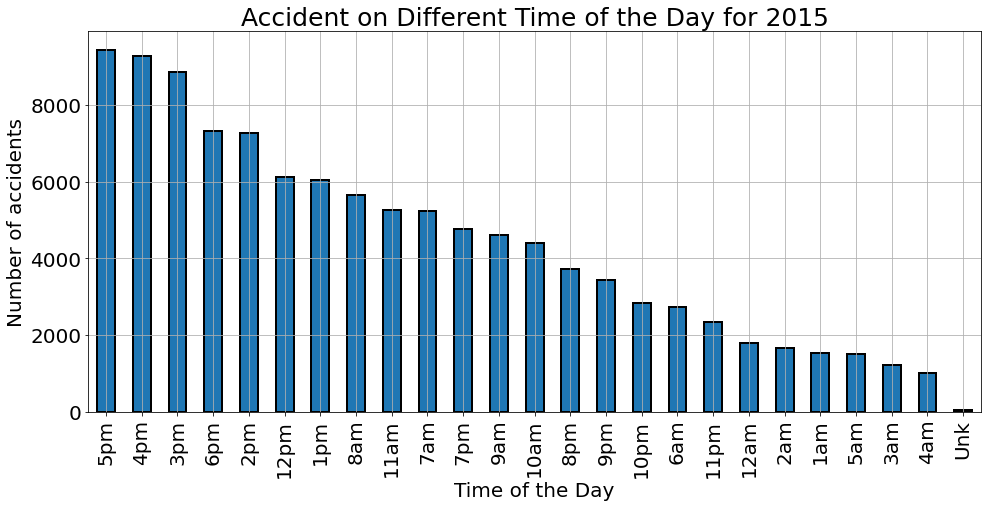

In [16]:
# Accidents on Different Time of Day for the year 2015
fig, ax=plt.subplots(figsize=(16,7))
crash15['TIME'].value_counts(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Time of the Day',fontsize=20)
plt.ylabel('Number of accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Accident on Different Time of the Day for 2015',fontsize=25)
plt.grid()
plt.ioff()

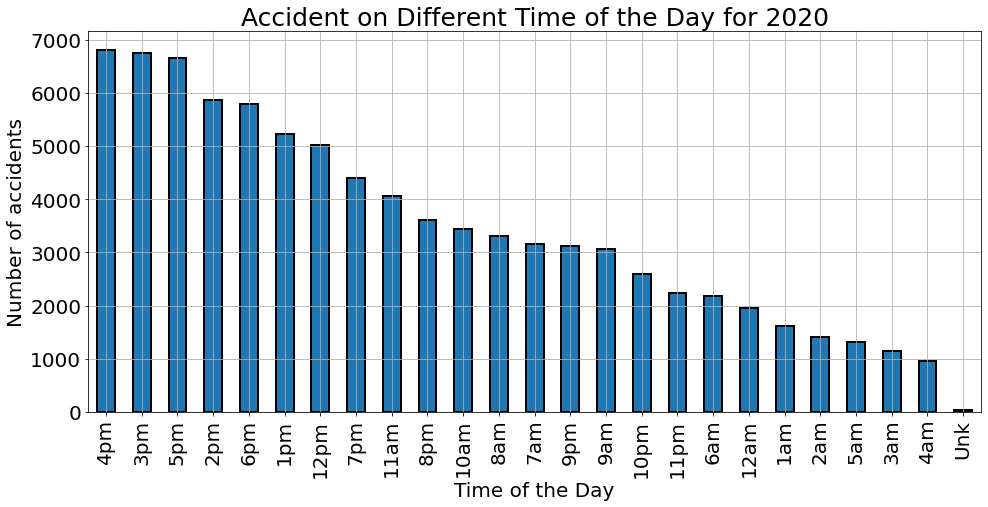

In [17]:
# Accidents on Different Time of Day for the year 2020
fig, ax=plt.subplots(figsize=(16,7))
crash20['TIME'].value_counts(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Time of the Day',fontsize=20)
plt.ylabel('Number of accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Accident on Different Time of the Day for 2020',fontsize=25)
plt.grid()
plt.ioff()

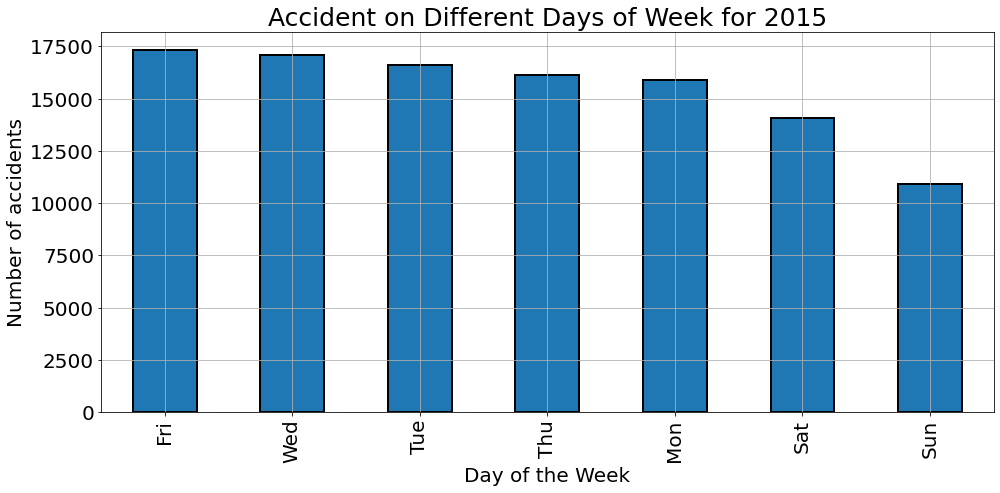

In [18]:
# Accidents on Different Days of Week for the year 2015
fig, ax=plt.subplots(figsize=(16,7))
crash15['DAY'].value_counts(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Day of the Week',fontsize=20)
plt.ylabel('Number of accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Accident on Different Days of Week for 2015',fontsize=25)
plt.grid()
plt.ioff()

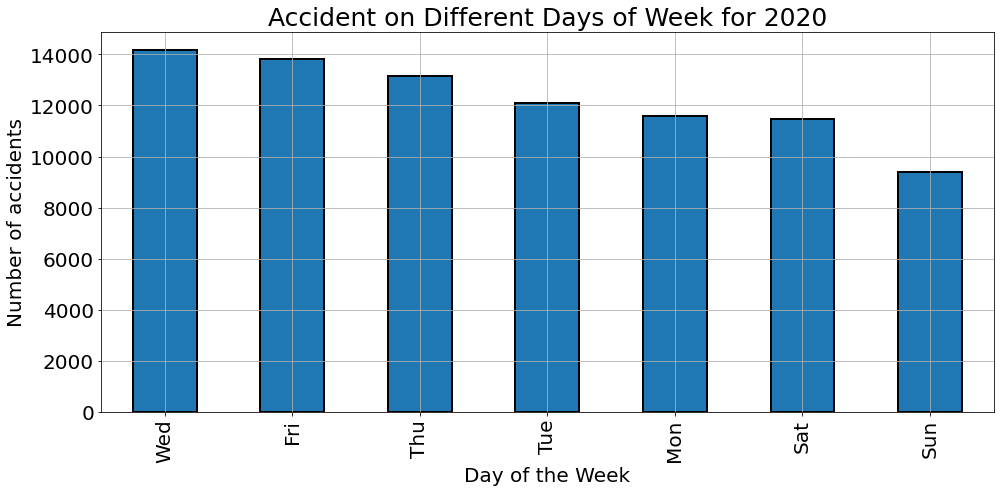

In [19]:
# Accidents on Different Days of Week for the year 2020
fig, ax=plt.subplots(figsize=(16,7))
crash20['DAY'].value_counts(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Day of the Week',fontsize=20)
plt.ylabel('Number of accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Accident on Different Days of Week for 2020',fontsize=25)
plt.grid()
plt.ioff()

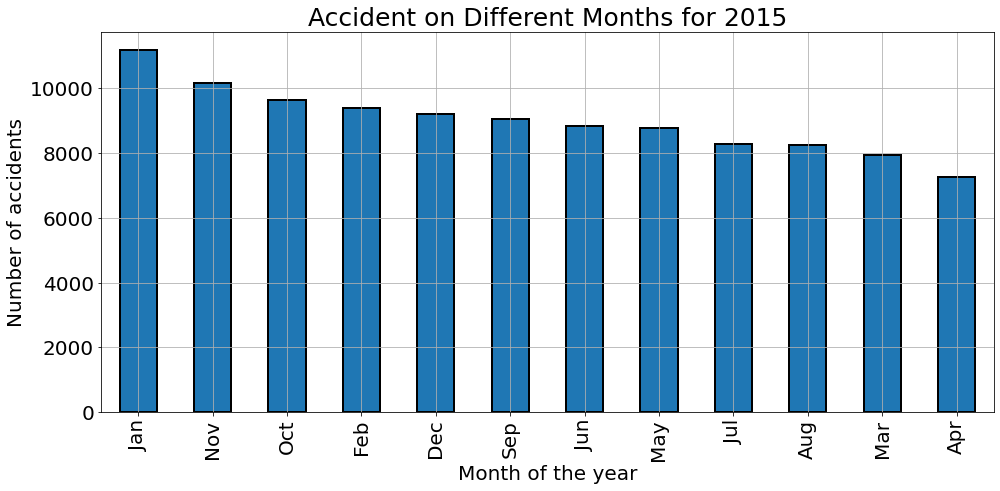

In [20]:
# Accidents on Different Months for the year 2015
fig, ax=plt.subplots(figsize=(16,7))
crash15['MONTH'].value_counts(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Month of the year',fontsize=20)
plt.ylabel('Number of accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Accident on Different Months for 2015',fontsize=25)
plt.grid()
plt.ioff()

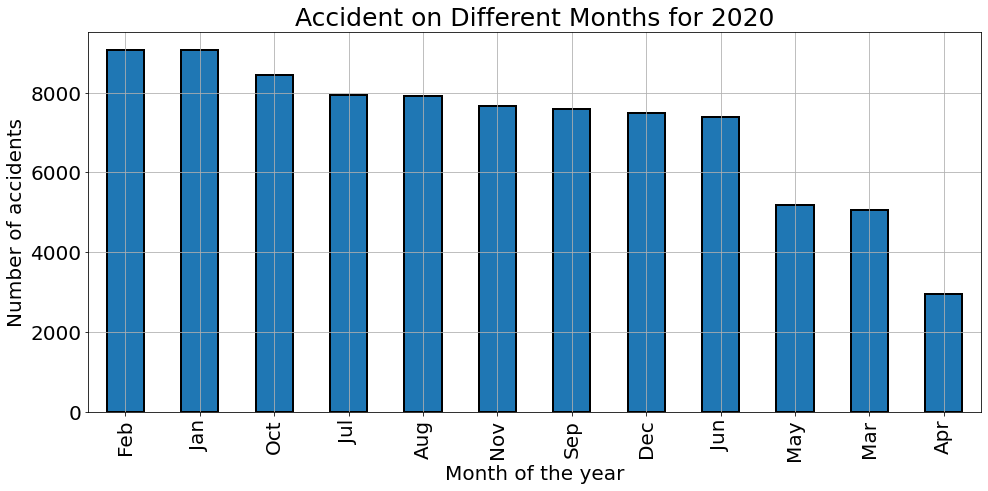

In [21]:
# Accidents on Different Months for the year 2020
fig, ax=plt.subplots(figsize=(16,7))
crash20['MONTH'].value_counts(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Month of the year',fontsize=20)
plt.ylabel('Number of accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Accident on Different Months for 2020',fontsize=25)
plt.grid()
plt.ioff()

## Weather Condition 

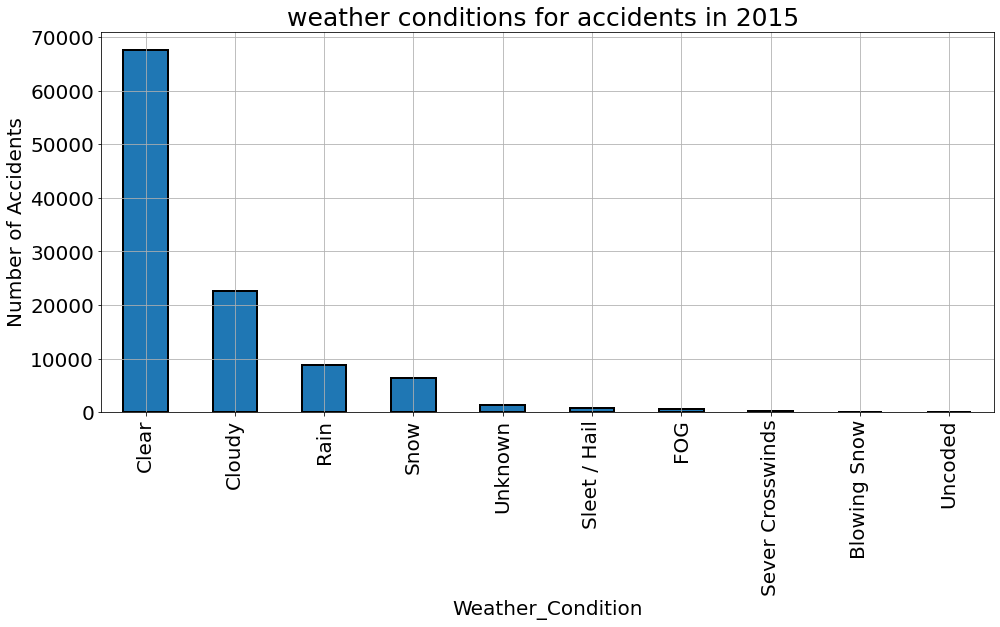

In [22]:
# Wether Condition on Accident for 2015
fig ,ax =plt.subplots(figsize=(16,7))
crash15['WEATHER'].value_counts().sort_values(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weather_Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('weather conditions for accidents in 2015 ',fontsize=25)
plt.grid()
plt.ioff()

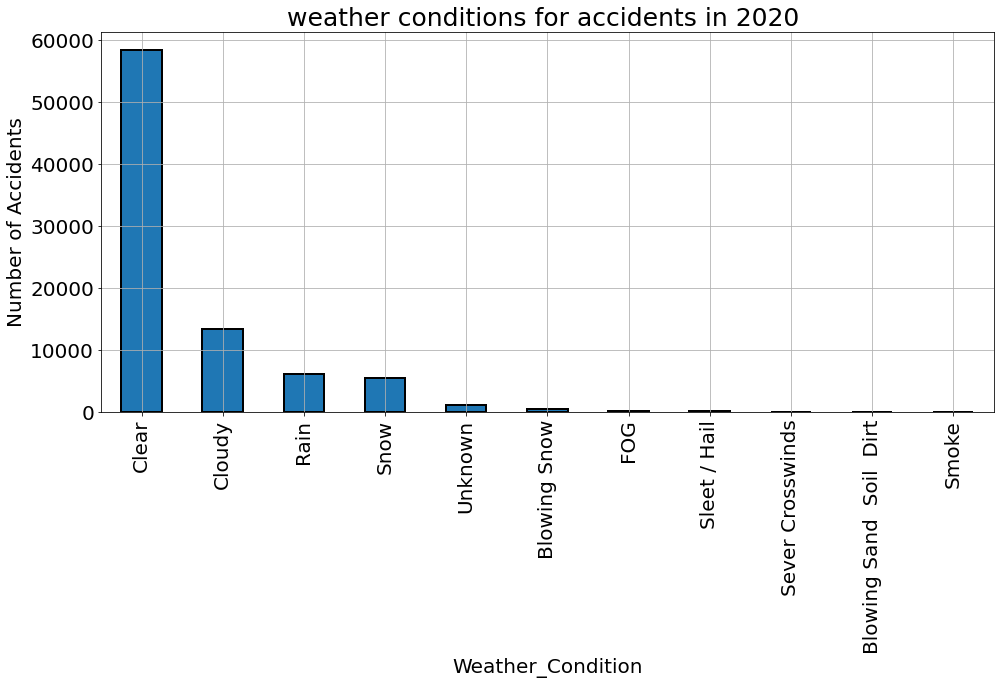

In [23]:
# Wether Condition on Accident for 2020
fig ,ax =plt.subplots(figsize=(16,7))
crash20['WEATHER'].value_counts().sort_values(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weather_Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('weather conditions for accidents in 2020 ',fontsize=25)
plt.grid()
plt.ioff()

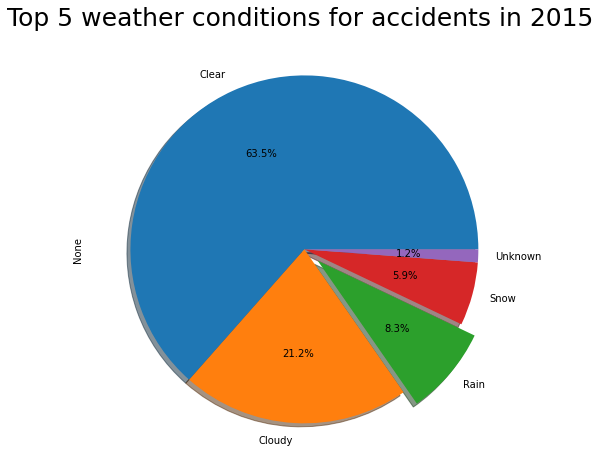

In [35]:
#Top 5 accicent weather conditions in 2015
plt.figure(figsize=(14,8))
plt.title('Top 5 weather conditions for accidents in 2015 ',fontsize=25)
crash15.groupby('WEATHER')  \
    .size()\
    .sort_values(ascending =False) \
    .iloc[:5] \
    .plot.pie(explode=[0,0,0.1,0,0],autopct='%1.1f%%',shadow=True)
plt.ioff()


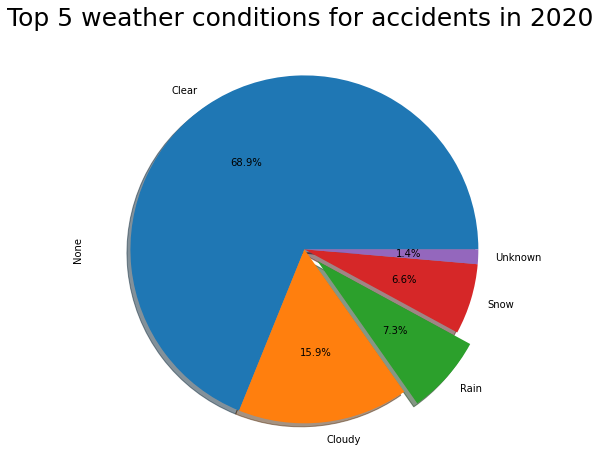

In [60]:
#Top 5 accicent weather conditions in 2020
plt.figure(figsize=(14,8))
plt.title('Top 5 weather conditions for accidents in 2020 ',fontsize=25)
crash20.groupby('WEATHER')  \
    .size()\
    .sort_values(ascending =False) \
    .iloc[:5] \
    .plot.pie(explode=[0,0,0.1,0,0],autopct='%1.1f%%',shadow=True)
plt.ioff()

In [62]:
crash15.head()

,CRSH_ID,ROADNAME,MILE,PR,MONTH,DATE,YEAR,DAY,TIME,SEVERITY,TYPE,WEATHER,LIGHTING,ROADCONDITION,OFFSETDISTANCE,UNITS,FACTOR,Unnamed: 17
0,9141401,S M 39,13.151,1592407,Jan,1,2015,Thu,8am,C-level,Single veh.,Clear,Daylight,Dry,NaN,1,A L,NaN
1,9141491,Pelham Rd,0.654,1652704,Jan,1,2015,Thu,1am,C-level,Single veh.,Clear,Lights,Dry,48.0,1,L,NaN
2,9141494,S M 39,2.249,1592407,Jan,1,2015,Thu,3am,PDO,Single veh.,Clear,Lights,Dry,0.0,1,A L,NaN
3,9141498,Schoolcraft Rd,8.918,4705258,Jan,1,2015,Thu,5am,PDO,Single veh.,Clear,Lights,Dry,11.0,1,A I,NaN
4,9141972,Arlingdale Dr,0.062,833709,Jan,1,2015,Thu,5am,PDO,Swipe-same,Clear,Dark,Dry,26.0,2,A,NaN


## Lighting Condition in Accident

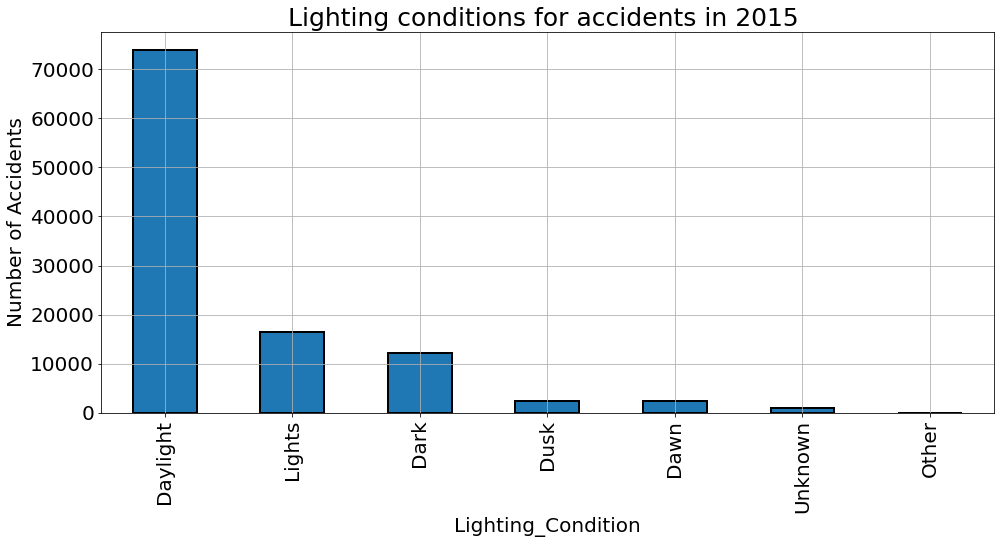

In [24]:
# Lighting Condition on Accident for 2015
fig ,ax =plt.subplots(figsize=(16,7))
crash15['LIGHTING'].value_counts().sort_values(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Lighting_Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Lighting conditions for accidents in 2015 ',fontsize=25)
plt.grid()
plt.ioff()

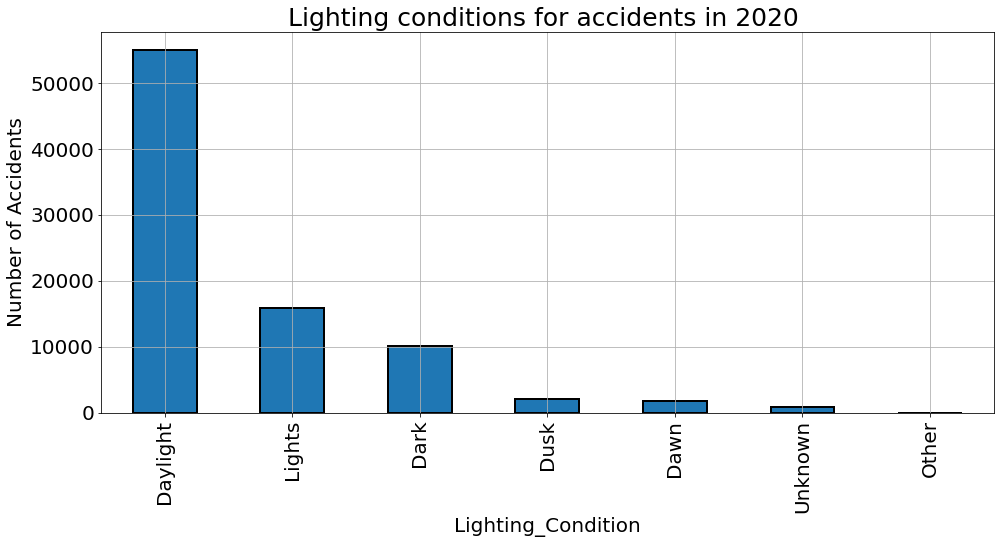

In [25]:
# Lighting Condition on Accident for 2020
fig ,ax =plt.subplots(figsize=(16,7))
crash20['LIGHTING'].value_counts().sort_values(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Lighting_Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Lighting conditions for accidents in 2020 ',fontsize=25)
plt.grid()
plt.ioff()

## Weather and Lighting for 2015

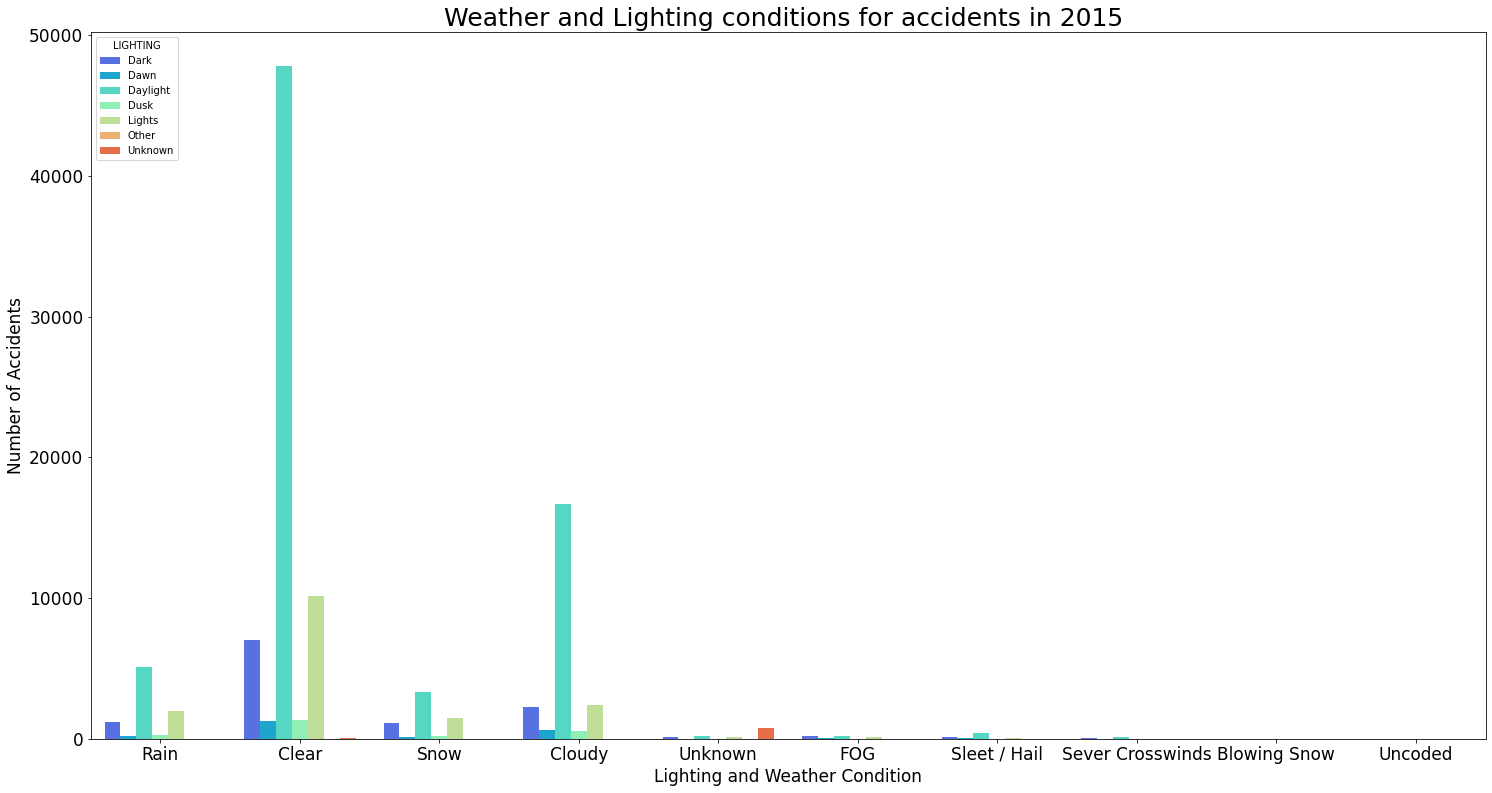

In [26]:
# Weather and Lighting for 2015
crash15s=crash15.sort_values(by="LIGHTING")
fig ,ax =plt.subplots(figsize=(25,13))
sns.countplot(x='WEATHER',data=crash15s, hue='LIGHTING', palette='rainbow')
plt.xlabel('Lighting and Weather Condition',fontsize=17)
plt.ylabel('Number of Accidents',fontsize=17)
ax.tick_params(labelsize=17)
plt.title('Weather and Lighting conditions for accidents in 2015 ',fontsize=25)
plt.ioff()

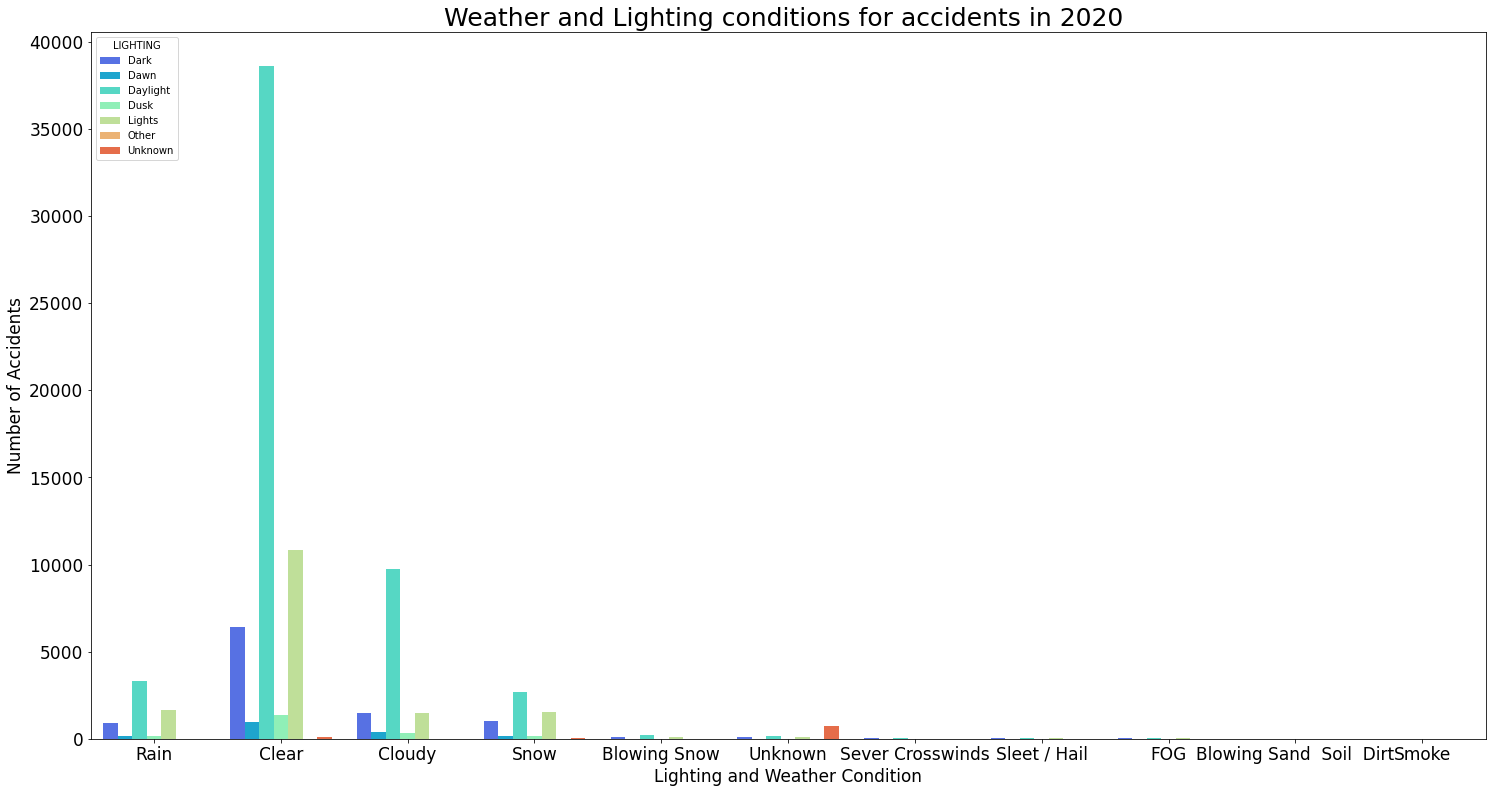

In [27]:
# Weather and Lighting for 2020
crash20s=crash20.sort_values(by="LIGHTING")
fig ,ax =plt.subplots(figsize=(25,13))
sns.countplot(x='WEATHER',data=crash20s, hue='LIGHTING', palette='rainbow')
plt.xlabel('Lighting and Weather Condition',fontsize=17)
plt.ylabel('Number of Accidents',fontsize=17)
ax.tick_params(labelsize=17)
plt.title('Weather and Lighting conditions for accidents in 2020 ',fontsize=25)
plt.ioff()

## Road Condition

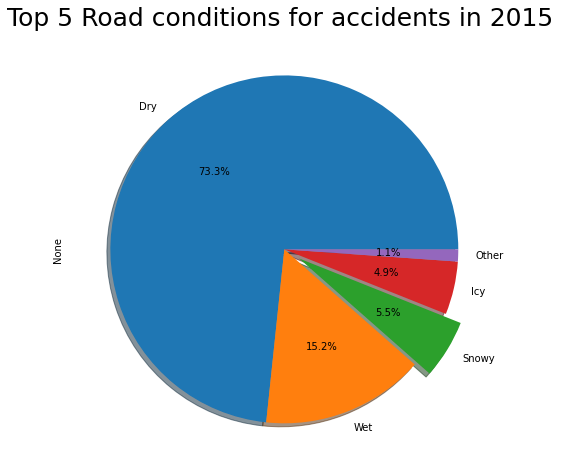

In [28]:
#Top 5 accicent weather conditions in 2015
plt.figure(figsize=(14,8))
plt.title('Top 5 Road conditions for accidents in 2015 ',fontsize=25)
crash15.groupby('ROADCONDITION')  \
    .size()\
    .sort_values(ascending =False) \
    .iloc[:5] \
    .plot.pie(explode=[0,0,0.1,0,0],autopct='%1.1f%%',shadow=True)
plt.ioff()

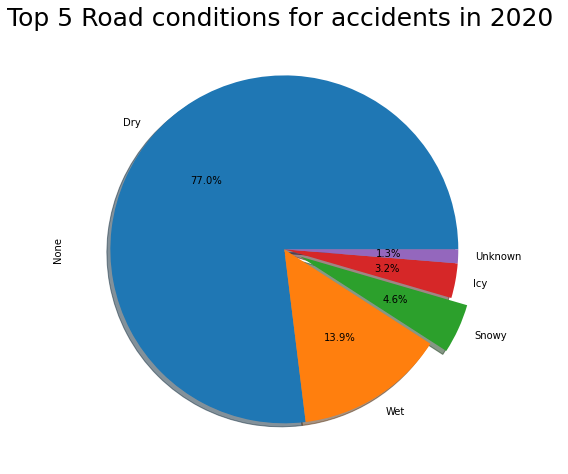

In [29]:
#Top 5 accicent weather conditions in 2020
plt.figure(figsize=(14,8))
plt.title('Top 5 Road conditions for accidents in 2020 ',fontsize=25)
crash20.groupby('ROADCONDITION')  \
    .size()\
    .sort_values(ascending =False) \
    .iloc[:5] \
    .plot.pie(explode=[0,0,0.1,0,0],autopct='%1.1f%%',shadow=True)
plt.ioff()

## Factors contribution to crashes

In [ ]:
 Younger Driver(Y), Lane Departure(L), Intersection(I), Distracted Driver(D),  Work Zone(W), Older Driver(O).

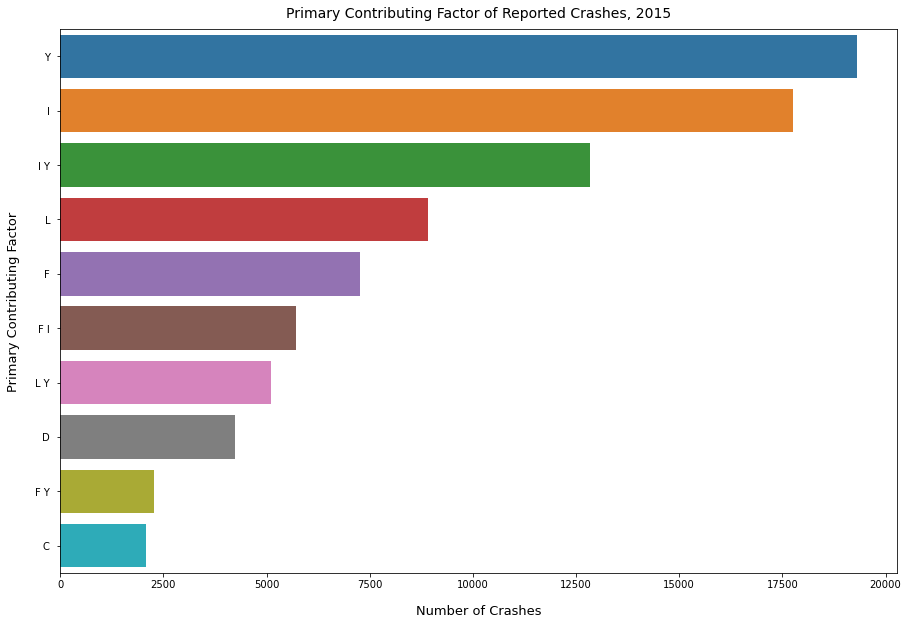

In [30]:
# Display a plot showing the primary contributing factors of reported crashes in 2015.
plt.figure(figsize=(15, 10))
sns.countplot(data=crash15,  y='FACTOR', order = crash15['FACTOR'].value_counts().iloc[:10].index)
plt.title('Primary Contributing Factor of Reported Crashes, 2015', y=1.01, fontsize=14)
plt.xlabel('Number of Crashes', fontsize=13, labelpad=15)
plt.ylabel('Primary Contributing Factor', fontsize=13, labelpad=15)
plt.show();

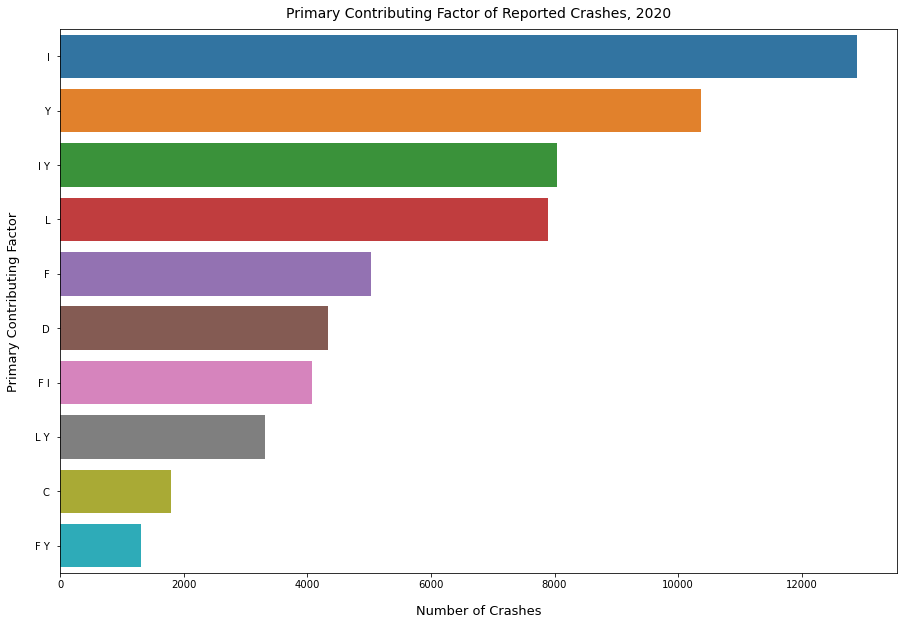

In [31]:
# Display a plot showing the primary contributing factor of reported crashes in 2015.
plt.figure(figsize=(15, 10))
sns.countplot(data=crash20,  y='FACTOR', order = crash20['FACTOR'].value_counts().iloc[:10].index)
plt.title('Primary Contributing Factor of Reported Crashes, 2020', y=1.01, fontsize=14)
plt.xlabel('Number of Crashes', fontsize=13, labelpad=15)
plt.ylabel('Primary Contributing Factor', fontsize=13, labelpad=15)
plt.show();

## Lighting condition for crash with death 

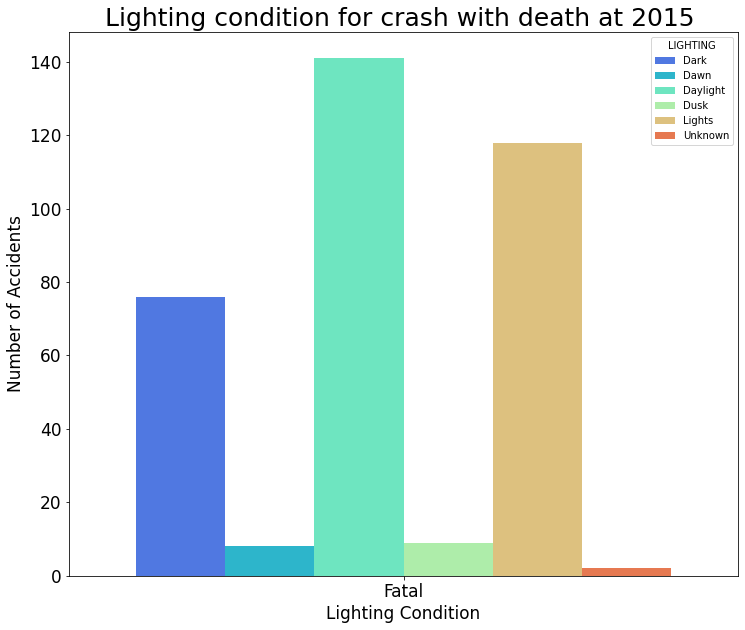

In [32]:
#Lighting condition for crash with death at 2015
crash15s=crash15.sort_values(by="LIGHTING")
fig ,ax =plt.subplots(figsize=(12,10))
sns.countplot(x='SEVERITY',data=crash15s[crash15s['SEVERITY'] == 'Fatal'], hue='LIGHTING', palette='rainbow')
plt.xlabel('Lighting Condition',fontsize=17)
plt.ylabel('Number of Accidents',fontsize=17)
ax.tick_params(labelsize=17)
plt.title('Lighting condition for crash with death at 2015 ',fontsize=25)
plt.ioff()

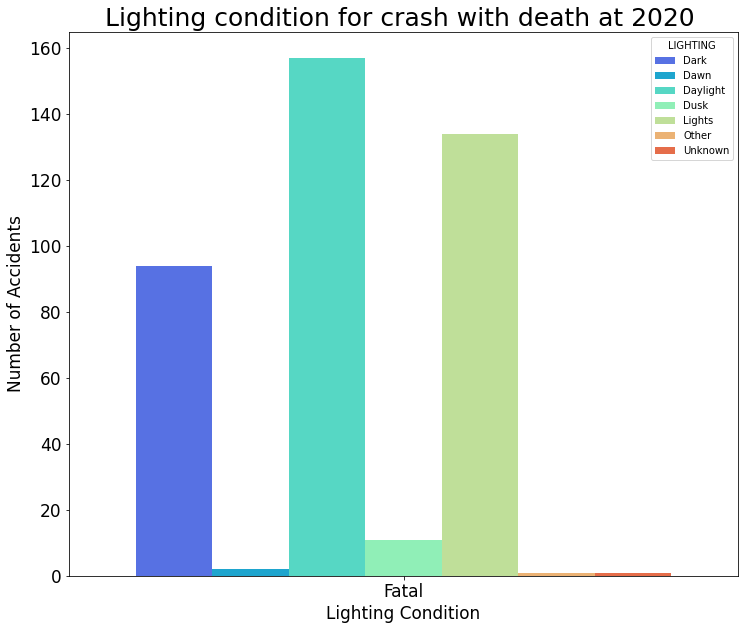

In [33]:
#Lighting condition for crash with death at 2020
crash20s=crash20.sort_values(by="LIGHTING")
fig ,ax =plt.subplots(figsize=(12,10))
sns.countplot(x='SEVERITY',data=crash20s[crash20s['SEVERITY'] == 'Fatal'], hue='LIGHTING', palette='rainbow')
plt.xlabel('Lighting Condition',fontsize=17)
plt.ylabel('Number of Accidents',fontsize=17)
ax.tick_params(labelsize=17)
plt.title('Lighting condition for crash with death at 2020 ',fontsize=25)
plt.ioff()